In [29]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def readnclean_hamsini_file(file_location):
    current_file = pd.read_csv('/data/suresh/pansol/paralog_scores/'+file_location)
    current_file = current_file[['species','Gene1','Gene2','Orthogroup','num_paralogs','exp1','exp2','exp1_exc0','exp2_exc0','classification5']]
    current_file = current_file.dropna(subset='classification5')
    return current_file
    

In [24]:
list_of_files = os.listdir('/data/suresh/pansol/paralog_scores/')
list_of_files

['Sabu2_paralog_classification.csv',
 'Saet3_paralog_classification.csv',
 'Same3_paralog_classification.csv',
 'Sang8_paralog_classification.csv',
 'Scan1_paralog_classification.csv',
 'Scit1_paralog_classification.csv',
 'Scle2_paralog_classification.csv',
 'Setu1_paralog_classification.csv',
 'Shav1_paralog_classification.csv',
 'Sins1_paralog_classification.csv',
 'Slin1_paralog_classification.csv',
 'Smac3_paralog_classification.csv',
 'Smam1_paralog_classification.csv',
 'Smur2hap1_paralog_classification.csv',
 'Spri1_paralog_classification.csv',
 'Spse1_paralog_classification.csv',
 'Squi2_paralog_classification.csv',
 'Srob1_paralog_classification.csv',
 'Sstr1_paralog_classification.csv',
 'Stor1_paralog_classification.csv',
 'Svio1_paralog_classification.csv',
 'Slyc4_paralog_classification.csv']

In [17]:
core_classifier = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Core_annotation/Genes_with_Category.txt', names=['Gene','Orthogroup','Ortho_num','Classification'], sep = '\t')
core_classifier_cleaned = core_classifier.drop_duplicates(subset= ['Orthogroup','Classification'])
core_classifier_cleaned = core_classifier_cleaned.dropna()
core_classifier_cleaned

In [22]:
current_file.merge(on = 'Orthogroup',right = core_classifier_cleaned, how = 'left')

,species,Gene1,Gene2,Orthogroup,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,classification5,Gene,Ortho_num,Classification
0,Saet3,Solaet3_01g024230,Solaet3_03g016670,OG0000000,94,1.843642,1.609474,2.419780,1.778893,conserved,Phygri_01g010260.1,26,Near_Core
1,Saet3,Solaet3_01g024230,Solaet3_06g014380,OG0000000,94,1.843642,2.938211,2.419780,3.629554,diverged,Phygri_01g010260.1,26,Near_Core
2,Saet3,Solaet3_01g024230,Solaet3_10g011990,OG0000000,94,1.843642,14.102761,2.419780,14.102761,diverged,Phygri_01g010260.1,26,Near_Core
3,Saet3,Solaet3_02g000480,Solaet3_05g025840,OG0000000,94,0.159787,1.463587,0.372837,2.049022,diverged,Phygri_01g010260.1,26,Near_Core
4,Saet3,Solaet3_02g000480,Solaet3_10g011990,OG0000000,94,0.159787,14.102761,0.372837,14.102761,diverged,Phygri_01g010260.1,26,Near_Core
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,Saet3,Solaet3_04g007390,Solaet3_08g010240,OG0033703,3,300.676596,76.032835,300.676596,76.032835,comp_drift_sym,Solaet3_04g007390.1,1,Private
4226,Saet3,Solaet3_04g007390,Solaet3_09g001110,OG0033703,3,300.676596,46.187827,300.676596,46.187827,comp_drift_sym,Solaet3_04g007390.1,1,Private
4227,Saet3,Solaet3_08g010240,Solaet3_09g001110,OG0033703,3,76.032835,46.187827,76.032835,46.187827,conserved,Solaet3_04g007390.1,1,Private
4228,Saet3,Solaet3_07g000400,Solaet3_07g000450,OG0033798,2,0.253496,2.321593,0.443619,2.321593,comp_drift_asym,Solaet3_07g000400.1,2,Dispensible


In [25]:
full_results_dataframe = pd.DataFrame()
for file in list_of_files:
    current_file = readnclean_hamsini_file(file)
    if len(current_file) == 0:
        continue 
    current_file = current_file.merge(on = 'Orthogroup',right = core_classifier_cleaned, how = 'left')
    full_results_dataframe = pd.concat([full_results_dataframe,current_file])
    



/tmp/ipykernel_1044072/768791788.py:2: DtypeWarning: Columns (21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  current_file = pd.read_csv('/data/suresh/pansol/paralog_scores/'+file_location)
/tmp/ipykernel_1044072/768791788.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  current_file = pd.read_csv('/data/suresh/pansol/paralog_scores/'+file_location)
/tmp/ipykernel_1044072/768791788.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  current_file = pd.read_csv('/data/suresh/pansol/paralog_scores/'+file_location)
/tmp/ipykernel_1044072/768791788.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  current_file = pd.read_csv('/data/suresh/pansol/paralog_scores/'+file_location)
/tmp/ipykernel_1044072/768791788.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on i

In [26]:
full_results_dataframe

,species,Gene1,Gene2,Orthogroup,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,classification5,Gene,Ortho_num,Classification
0,Saet3,Solaet3_01g024230,Solaet3_03g016670,OG0000000,94,1.843642,1.609474,2.419780,1.778893,conserved,Phygri_01g010260.1,26,Near_Core
1,Saet3,Solaet3_01g024230,Solaet3_06g014380,OG0000000,94,1.843642,2.938211,2.419780,3.629554,diverged,Phygri_01g010260.1,26,Near_Core
2,Saet3,Solaet3_01g024230,Solaet3_10g011990,OG0000000,94,1.843642,14.102761,2.419780,14.102761,diverged,Phygri_01g010260.1,26,Near_Core
3,Saet3,Solaet3_02g000480,Solaet3_05g025840,OG0000000,94,0.159787,1.463587,0.372837,2.049022,diverged,Phygri_01g010260.1,26,Near_Core
4,Saet3,Solaet3_02g000480,Solaet3_10g011990,OG0000000,94,0.159787,14.102761,0.372837,14.102761,diverged,Phygri_01g010260.1,26,Near_Core
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,Slyc4,Solyc06g066490,Solyc06g066510,OG0030714,2,3.406384,0.714297,7.191256,2.467572,comp_drift_sym,Solyc06g066490.1.1,3,Dispensible
2499,Slyc4,Solyc00g015600,Solyc06g050890,OG0032488,2,0.666839,8.819955,3.619983,11.969939,comp_drift_asym,Solyc00g015600.1.1,2,Dispensible
2500,Slyc4,Solyc02g081345,Solyc02g081360,OG0032644,2,5.907114,3.649853,17.266947,3.649853,diverged,Solyc02g081345.1.1,2,Dispensible
2501,Slyc4,Solyc05g009360,Solyc11g008100,OG0032784,2,50.315828,4.450628,50.315828,4.697885,diverged,Solyc05g009360.4.1,2,Dispensible


In [36]:
full_results_dataframe = full_results_dataframe.rename(columns= {'classification5':'Paralog Classification','Classification':'Orthogroup Status'})
full_results_dataframe = full_results_dataframe.replace({'comp_drift_sym':'Transcriptional drift', 'diverged':'Divergence','conserved':'Dosage balance','comp_drift_asym':'Specialization'})

<AxesSubplot:xlabel='Orthogroup Status'>

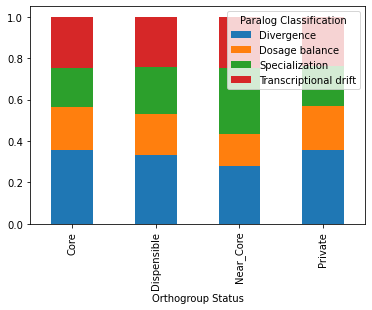

In [37]:
(full_results_dataframe.groupby('Orthogroup Status')['Paralog Classification'].value_counts(normalize=True)
   .unstack('Paralog Classification').plot.bar(stacked=True)
)

0 Orthogroup Status
Core           0.703382
Dispensible    0.045972
Near_Core      0.245217
Private        0.005430
Name: 0, dtype: float64
1 Orthogroup Status
Core           0.711033
Dispensible    0.046796
Near_Core      0.236681
Private        0.005490
Name: 1, dtype: float64
2 Orthogroup Status
Core           0.542332
Dispensible    0.045669
Near_Core      0.407724
Private        0.004274
Name: 2, dtype: float64
3 Orthogroup Status
Core           0.657163
Dispensible    0.045312
Near_Core      0.292646
Private        0.004880
Name: 3, dtype: float64


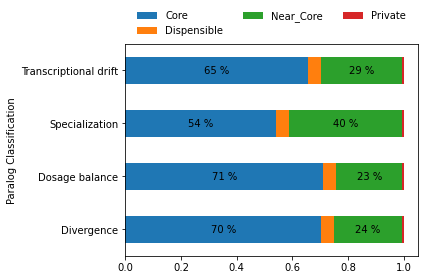

In [38]:
x_var, y_var = "Paralog Classification", "Orthogroup Status"
df_grouped = full_results_dataframe.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.barh(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element
plt.tight_layout()

0 Paralog Classification
Divergence               0.356428
Dosage balance           0.207038
Specialization           0.189508
Transcriptional drift    0.247026
Name: 0, dtype: float64
1 Paralog Classification
Divergence               0.333208
Dosage balance           0.194903
Specialization           0.228261
Transcriptional drift    0.243628
Name: 1, dtype: float64
2 Paralog Classification
Divergence               0.278826
Dosage balance           0.154642
Specialization           0.319692
Transcriptional drift    0.246840
Name: 2, dtype: float64
3 Paralog Classification
Divergence               0.358362
Dosage balance           0.208191
Specialization           0.194539
Transcriptional drift    0.238908
Name: 3, dtype: float64


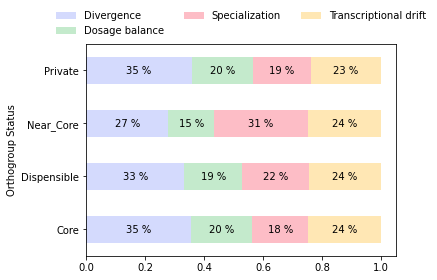

In [54]:


x_var, y_var = "Orthogroup Status", "Paralog Classification"
df_grouped = full_results_dataframe.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
fig= df_grouped.plot.barh(stacked=True, color = ['#d4dafd','#c4eacc','#fdbdc6','#ffe7b4'])
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element
plt.tight_layout()
fig.patch.set_facecolor('w')
